In [1]:
#import libraries and dataset
import pandas as pd
from matplotlib import  pyplot
df= pd.read_csv('iris.csv')
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [2]:
#preprocessing
print(df.isnull().values.any())
df=df.drop(columns=['Id'],axis=1)

False


In [3]:
# Summarizing the dataset
# Dimensions of dataset
df.shape

(150, 5)

In [4]:
#peek at the dataset
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
#statistical summary
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#class distribution
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

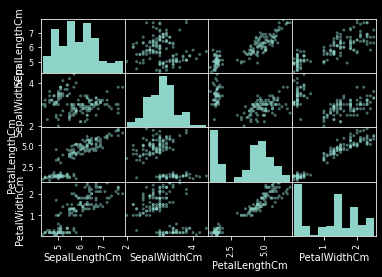

In [7]:
#data visvalization
from pandas.plotting import  scatter_matrix
scatter_matrix(df)
pyplot.show()

In [8]:
#split the dataset
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'],axis=1)
y=df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#model building
from sklearn.neighbors import KNeighborsClassifier #load library
knn = KNeighborsClassifier(n_neighbors=3) #create model
knn.fit(x_train,y_train) #fit the model
print(knn.score(x_test,y_test)) #find accuracy of the model unsing test_dataset

0.9666666666666667


In [10]:
from sklearn.metrics import confusion_matrix
#for create confusion matrix we need predicted value
y_pred=knn.predict(x_test)
#creaate confusion matrix by comparing Y_test(actual) and predicted value
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])